In [1]:
# correlate effects 

In [2]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
base_path = os.path.dirname(os.getcwd())

ami = pd.read_csv(base_path + '/data/jessen/jessen_effectsize.csv')
ola = pd.read_csv(base_path + '/data/STOPPD/parcelwise_withingroup.csv')
clz = pd.read_csv(base_path + '/data/CLZ44/stats/parcelwise_effectsize.csv')

enigma_data = pd.read_csv(base_path + '/data/ENIGMA/ENIGMA_S32_partial_correlation_between_cortical_thickness_and_chlorpromazine_equivalents.csv')
enigma_data = enigma_data[:-2]

In [5]:
# sanity check that all regions are in the same order
regions = pd.DataFrame({'ola': ola['parcel'], 'ami':ami['parcel'], 'clz': clz['parcel'], 'ENIGMA': enigma_data['region']})
regions

,ola,ami,clz,ENIGMA
0,lh_bankssts_thickness,L_bankssts,lh_bankssts_thickness,Left banks of superior temporal sulcus
1,lh_caudalanteriorcingulate_thickness,L_caudalanteriorcingulate,lh_caudalanteriorcingulate_thickness,Left caudal anterior cingulate cortex
2,lh_caudalmiddlefrontal_thickness,L_caudalmiddlefrontal,lh_caudalmiddlefrontal_thickness,Left caudal middle frontal gyrus
3,lh_cuneus_thickness,L_cuneus,lh_cuneus_thickness,Left cuneus
4,lh_entorhinal_thickness,L_entorhinal,lh_entorhinal_thickness,Left entorhinal cortex
...,...,...,...,...
63,rh_supramarginal_thickness,R_supramarginal,rh_supramarginal_thickness,Right supramarginal gyrus
64,rh_frontalpole_thickness,R_frontalpole,rh_frontalpole_thickness,Right frontal pole
65,rh_temporalpole_thickness,R_temporalpole,rh_temporalpole_thickness,Right temporal pole
66,rh_transversetemporal_thickness,R_transversetemporal,rh_transversetemporal_thickness,Right transverse temporal gyrus


In [7]:
df = pd.DataFrame({'parcel':ola['parcel'], 'ami':ami['hedges_g'], 'ola':ola['hedges_g'], 'clz':clz['hedges_g'], 'enigma':enigma_data['partial_r']})


<Axes: xlabel='clz', ylabel='enigma'>

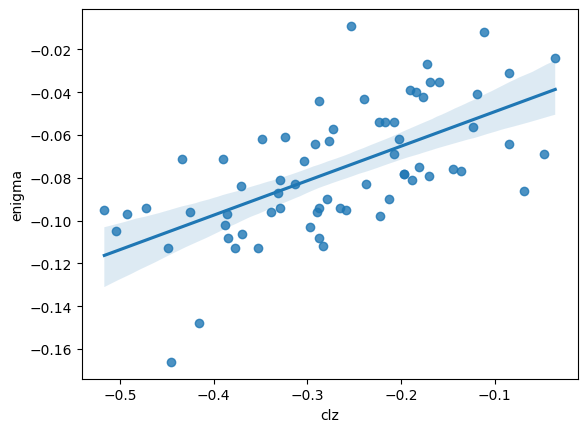

In [9]:
sns.regplot(df, x='clz', y='enigma')

PearsonRResult(statistic=0.4233185139562289, pvalue=0.0003222280967502019)


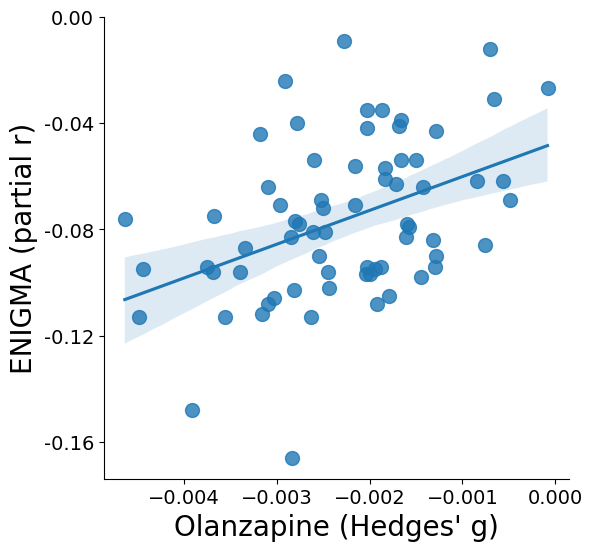

In [58]:
fig  = plt.figure(figsize=(6,6))
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
sns.regplot(df, x='ola', y='enigma', scatter_kws={'s': 100});

fontdict = {'size':20}
plt.xlabel("Olanzapine (Hedges' g)", fontdict=fontdict)
plt.ylabel("ENIGMA (partial r)", fontdict=fontdict)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.yticks(ticks=[-0.16, -0.12,  -0.08 ,-0.04, 0.00 ], labels=["-0.16",  "-0.12","-0.08",  "-0.04", "0.00" ]);

print(pearsonr(ola['hedges_g'],enigma_data['partial_r']))

<Axes: xlabel='ami', ylabel='enigma'>

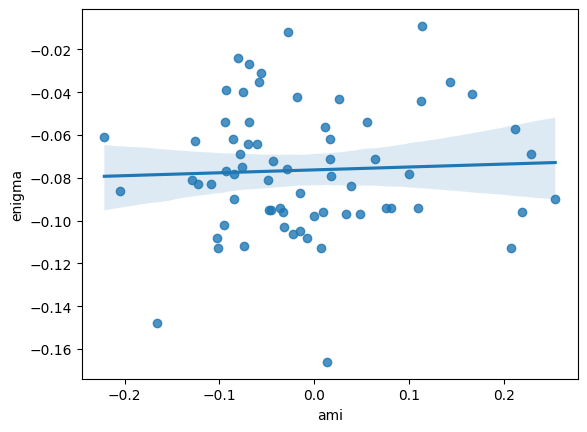

In [41]:
sns.regplot(df, x='ami', y='enigma')